# Dimension Reduction With PCA

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import boston dataset
data = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\PCA\\heart disease.csv')

In [3]:
# Top rows of dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Check the column titles
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Check for duplicate values

data.duplicated().sum()

1

There is one duplicate value

In [6]:
# Dropping the Duplicate Value
data.drop_duplicates(inplace=True)

In [7]:
# Shape of dataset
data.shape

(302, 14)

In [8]:
# Get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
# Check for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values in the given datasets 

In [10]:
# Check for NA values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Replacing Nan and infinity values
np.nan_to_num(data)

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [12]:
# Display desciptive statistics for the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# Use boxplot to check for outliers
feature_dict = pd.DataFrame(columns=['Name of Feature','Description','Type','Relevance'])

In [14]:
feature_dict ['Name of Feature'] = data.columns

In [15]:
feature_dict ['Description'] = ['age of the patient','sex of the patient','chest pain type','resting blood pressure',
                                'serum cholesterol','fasting blood sugar','resting electrocardiogram results','maximum heart rate achieved'
                                ,'exercise-induced angina','oldpeak','slope of the peak exercise ST segment','heartscan',
                                'blood disorder called thalassemia','output']

In [16]:
feature_dict['Type'] = ['Ratio','Binary','Nominal','Ratio','Ratio','Ordinal','Nominal','Ratio','Binary','Ratio',
                        'Ordinal','Ratio','Nominal','Binary']

In [17]:
feature_dict['Relevance'] = ['Relevant','Relevant','Relevant','Relevant','Relevant','Relevant','Relevant','Relevant','Relevant',
                            'Relevant','Relevant','Relevant','Relevant','Relevant']

In [18]:
feature_dict

,Name of Feature,Description,Type,Relevance
0,age,age of the patient,Ratio,Relevant
1,sex,sex of the patient,Binary,Relevant
2,cp,chest pain type,Nominal,Relevant
3,trestbps,resting blood pressure,Ratio,Relevant
4,chol,serum cholesterol,Ratio,Relevant
5,fbs,fasting blood sugar,Ordinal,Relevant
6,restecg,resting electrocardiogram results,Nominal,Relevant
7,thalach,maximum heart rate achieved,Ratio,Relevant
8,exang,exercise-induced angina,Binary,Relevant
9,oldpeak,oldpeak,Ratio,Relevant


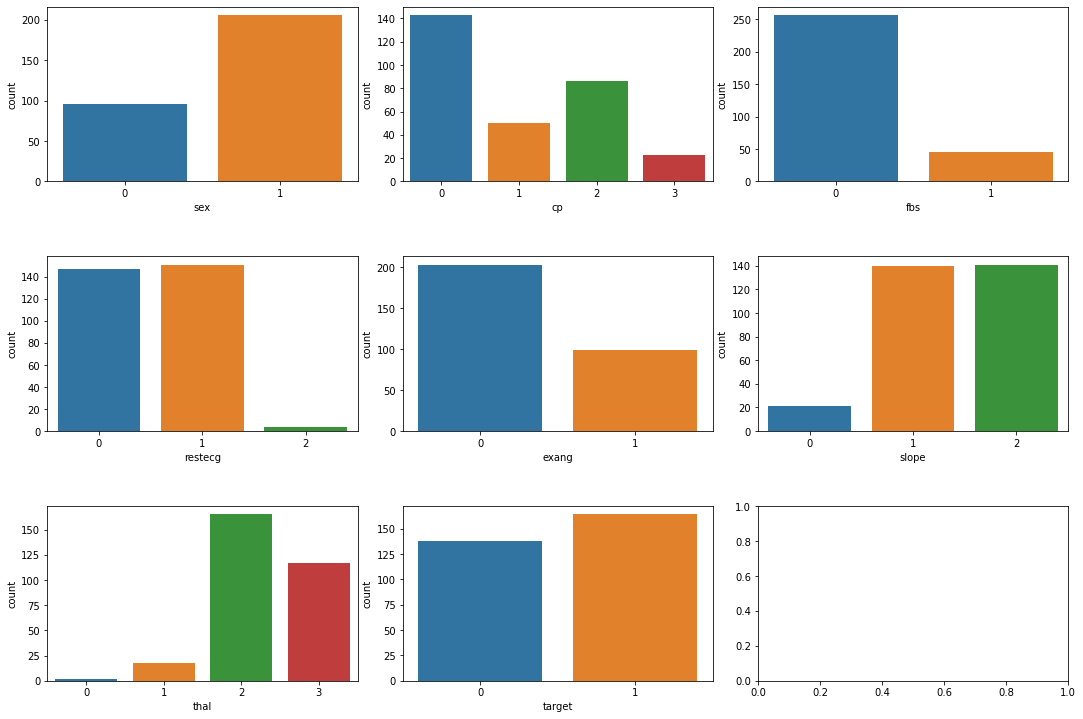

In [19]:
# Countplot of Categorical features
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,[1,2,5,6,8,10,12,13]]
for k,v in data1.items():
    sns.countplot(x=k, data=data1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

#### Obeservations:

1. The data is not balanced as there are more number of Males than Females. 
2. Patients with Chest pain of type 0 (typical angina) followed by Type 2 (non-anginal) are seen more.
3. Fasting Blood Sugar of patients are Normal,very few patients have diabetes.
4. Resting ECG results show high number of value 0 and value 1.
5. Patients with no anigma can be seen more.
6. There seems to be patients with upsloping and flat ST segments.
7. Thalassemia Value 2 i.e. normal blood flow is seen more in patients followed by thalassemia value 3 reversible blood flow.

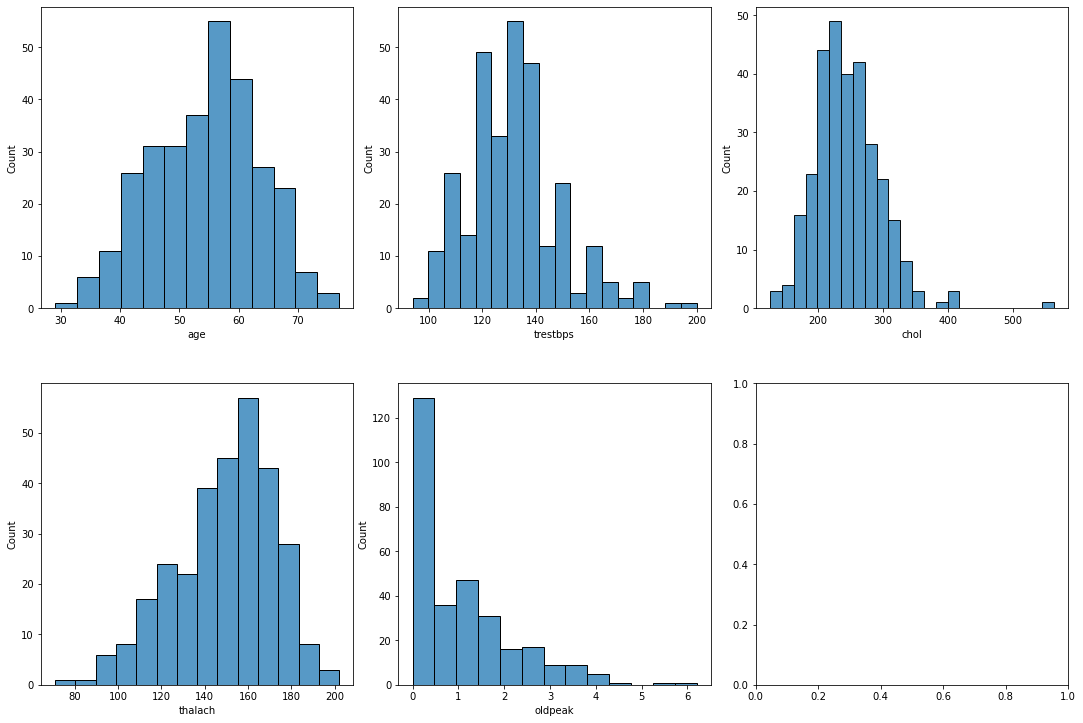

In [20]:
# Histograms
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,[0,3,4,7,9]]
for k,v in data1.items():
    sns.histplot(x=k, data=data1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

Age,thalach is normally distributed. Trestbps and chol are slighlty right skewed.

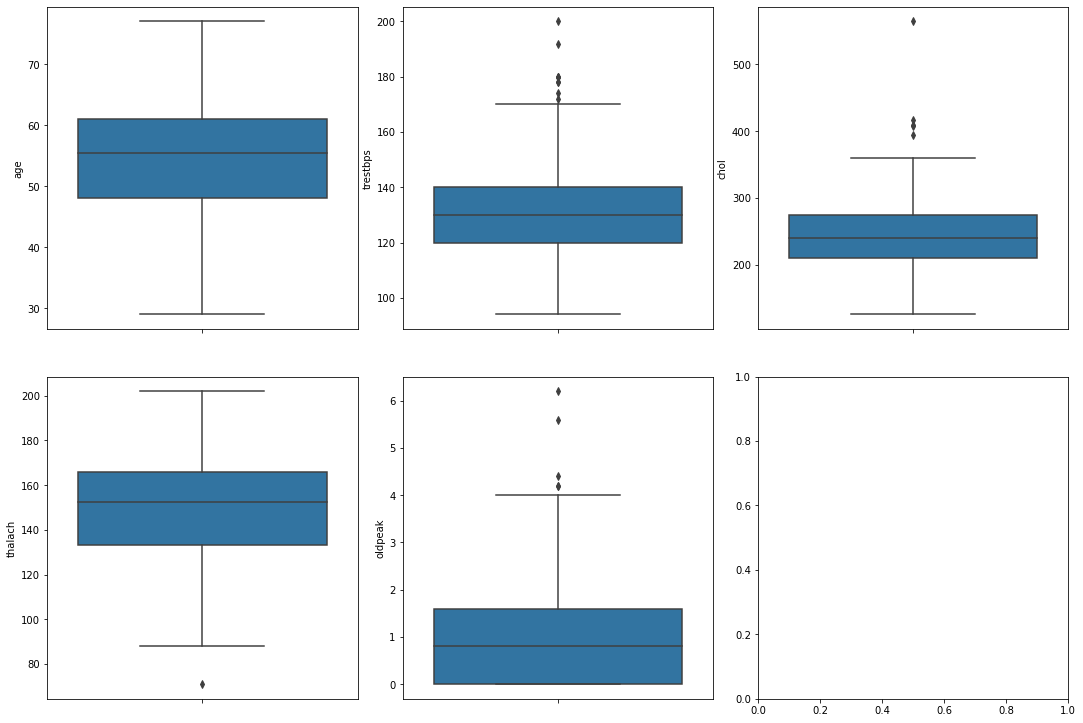

In [21]:
# Boxplot for all the features in the dataset to check for outliers

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,[0,3,4,7,9]]
for k,v in data1.items():
    sns.boxplot(y=k, data=data1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

Outliers are present in trestbpa and chol.

In [22]:
#Using IQR for outlier treatments

for feature in data.iloc[:,[3,4]]:
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    low_end = data[feature].quantile(0.25) - (1.5*IQR)
    upper_end = data[feature].quantile(0.75) + (1.5*IQR)
    data[feature] = pd.DataFrame(np.where(data[feature] > upper_end,upper_end, 
                          np.where(data[feature] < low_end,low_end,data[feature])))
    

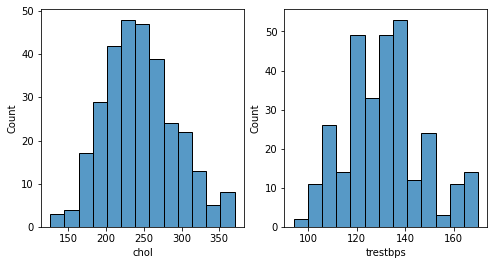

In [23]:
# Checking for distribution of chol and trestbps 
fig,axes = plt.subplots(1,2,figsize=(8,4))
sns.histplot(data.chol,ax=axes[0]);
sns.histplot(data.trestbps, ax=axes[1]);

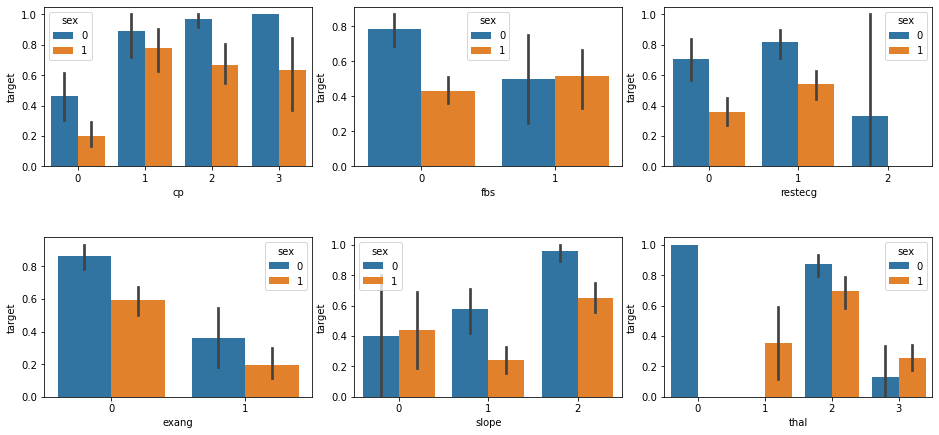

In [24]:
# Barplot between target and features wrt Sex
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(13, 6))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,[2,5,6,8,10,12]]
for feature in data1:
    sns.barplot(x= data[feature], y= data['target'],hue=data['sex'], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

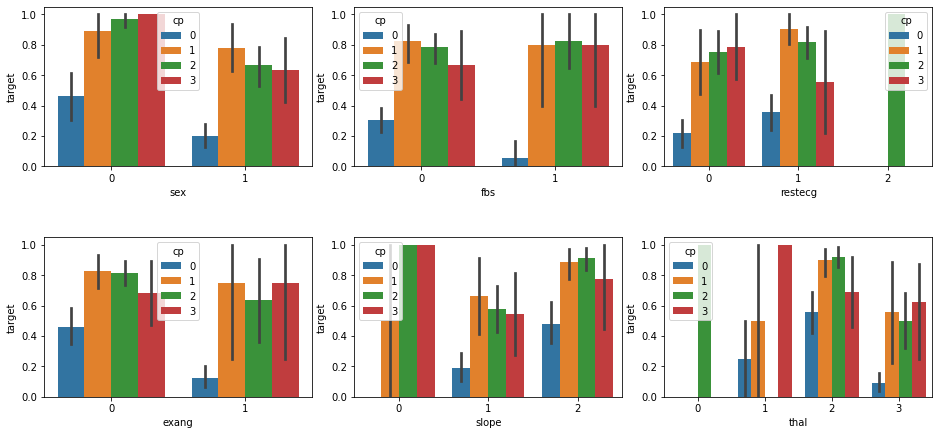

In [25]:
# Barplot between target and features wrt Chestpain
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(13, 6))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,[1,5,6,8,10,12]]
for feature in data1:
    sns.barplot(x= data[feature], y= data['target'],hue=data['cp'], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

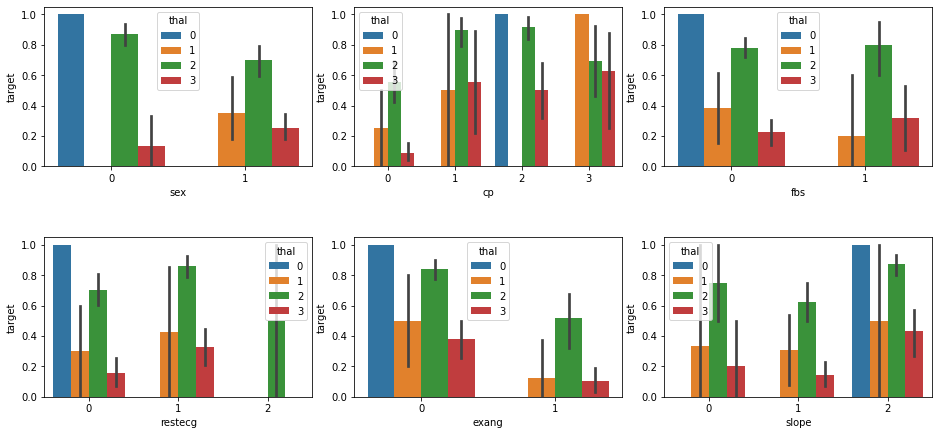

In [26]:
# Barplot between target and features wrt thal
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(13, 6))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,[1,2,5,6,8,10]]
for feature in data1:
    sns.barplot(x= data[feature], y= data['target'],hue=data['thal'], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

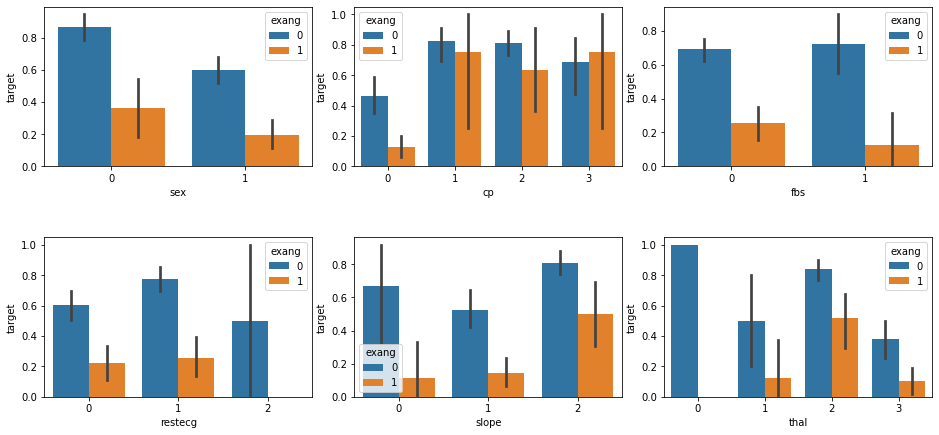

In [27]:
# Barplot between target and features wrt exang
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(13, 6))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,[1,2,5,6,10,12]]
for feature in data1:
    sns.barplot(x= data[feature], y= data['target'],hue=data['exang'], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

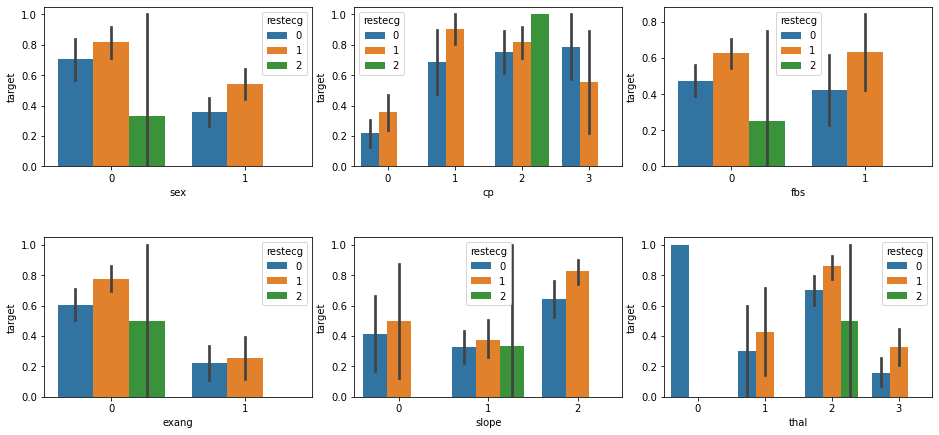

In [28]:
# Barplot between target and features wrt restecg
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(13, 6))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,[1,2,5,8,10,12]]
for feature in data1:
    sns.barplot(x= data[feature], y= data['target'],hue=data['restecg'], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

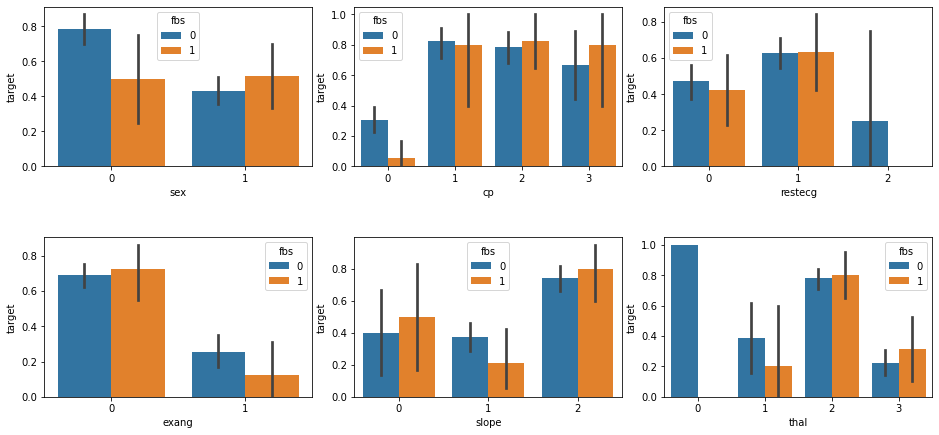

In [29]:
# Barplot between target and features wrt fasting blood sugar
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(13, 6))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,[1,2,6,8,10,12]]
for feature in data1:
    sns.barplot(x= data[feature], y= data['target'],hue=data['fbs'], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

([<matplotlib.patches.Wedge at 0x1bab83fbfd0>,
 [Text(-0.14830451966640817, 1.0899567741183667, '1'),
  Text(0.14830451966640754, -1.0899567741183667, '0')],
 [Text(-0.08089337436349535, 0.5945218767918362, '54.30%'),
  Text(0.080893374363495, -0.5945218767918363, '45.70%')])

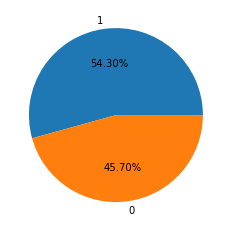

In [30]:
# Percentage of patients with heart disease
x = data.target.value_counts().values
label = ['1','0']
pie_chart = plt.pie(x,labels=label,autopct='%0.2f%%')
pie_chart

54.30 % patients have heartdisease. 

In [31]:
# Creating dummy values for nominal features 
d_cp = pd.get_dummies(data.cp,prefix='cp')
d_restecg = pd.get_dummies(data.restecg,prefix='restecg')
d_thal = pd.get_dummies(data.thal, prefix='thal')

In [32]:
# Concatening dataset with dummies
data = pd.concat([data,d_cp,d_restecg,d_thal],axis = 1)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145.0,233.0,1,0,150,0,2.3,...,0,0,1,1,0,0,0,1,0,0
1,37,1,2,130.0,250.0,0,1,187,0,3.5,...,0,1,0,0,1,0,0,0,1,0
2,41,0,1,130.0,204.0,0,0,172,0,1.4,...,1,0,0,1,0,0,0,0,1,0
3,56,1,1,120.0,236.0,0,1,178,0,0.8,...,1,0,0,0,1,0,0,0,1,0
4,57,0,0,120.0,354.0,0,1,163,1,0.6,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,110.0,264.0,0,1,123,1,0.2,...,0,0,0,0,1,0,0,0,0,1
299,45,1,3,144.0,193.0,0,1,132,0,1.2,...,0,0,1,0,1,0,0,0,0,1
300,68,1,0,130.0,131.0,1,1,141,0,3.4,...,0,0,0,0,1,0,0,0,0,1
301,57,1,0,130.0,236.0,0,1,115,1,1.2,...,0,0,0,0,1,0,0,0,0,1


In [33]:
# Dropping nominal features
data.drop('cp',axis=1,inplace=True)
data.drop('restecg',axis=1,inplace=True)
data.drop('thal',axis=1,inplace=True)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145.0,233.0,1,150,0,2.3,0,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130.0,250.0,0,187,0,3.5,0,0,...,0,1,0,0,1,0,0,0,1,0
2,41,0,130.0,204.0,0,172,0,1.4,2,0,...,1,0,0,1,0,0,0,0,1,0
3,56,1,120.0,236.0,0,178,0,0.8,2,0,...,1,0,0,0,1,0,0,0,1,0
4,57,0,120.0,354.0,0,163,1,0.6,2,0,...,0,0,0,0,1,0,0,0,1,0


In [34]:
# Dividing into categorical and numerical data
Num_data = data.iloc[:,[0,2,3,5,7]]
Cat_data = data.iloc[:,[1,4,6,8,9,10,11,12]]

In [35]:
Num_data.describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,301.000000,301.000000,302.000000,302.000000
mean,54.42053,131.162791,245.242110,149.569536,1.043046
std,9.04797,16.549625,47.507712,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.000000,152.500000,0.800000
75%,61.00000,140.000000,274.000000,166.000000,1.600000
max,77.00000,170.000000,370.375000,202.000000,6.200000


In [36]:
Num_data.chol = Num_data.chol.fillna(np.round(Num_data.chol.mean(),2))
Num_data.trestbps = Num_data.trestbps.fillna(np.round(Num_data.trestbps.mean(),2))

C:\Users\vaibh\AppData\Local\Temp\ipykernel_2792\2708440072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Num_data.chol = Num_data.chol.fillna(np.round(Num_data.chol.mean(),2))
C:\Users\vaibh\AppData\Local\Temp\ipykernel_2792\2708440072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Num_data.trestbps = Num_data.trestbps.fillna(np.round(Num_data.trestbps.mean(),2))


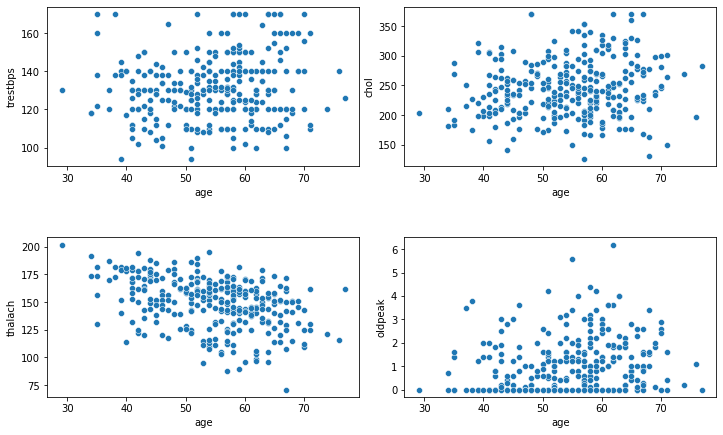

In [37]:
# Scatterplot between age and other numerical features

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 6))
index = 0
axs = axs.flatten()
data1 = Num_data.iloc[:,1:]
for feature in data1:
    sns.scatterplot(y= Num_data[feature], x= Num_data['age'],ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

In [38]:
Num_data.tail()

,age,trestbps,chol,thalach,oldpeak
298,57,110.00,264.00,123,0.2
299,45,144.00,193.00,132,1.2
300,68,130.00,131.00,141,3.4
301,57,130.00,236.00,115,1.2
302,57,131.16,245.24,174,0.0


In [39]:
Num_data.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.145694,0.140920,-0.395235,0.206040
trestbps,0.145694,1.000000,0.131310,-0.015180,0.156685
chol,0.140920,0.131310,1.000000,-0.041370,-0.053985
thalach,-0.395235,-0.015180,-0.041370,1.000000,-0.342201
oldpeak,0.206040,0.156685,-0.053985,-0.342201,1.000000


<AxesSubplot:>

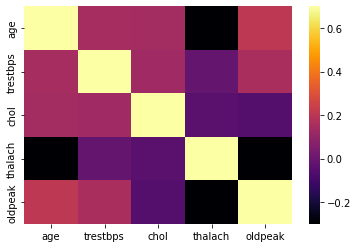

In [40]:
sns.heatmap(Num_data.corr(),vmin=-0.3,vmax=0.7, cmap='inferno')

## Standardization 

In [41]:
# Standardization of the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(Num_data)

## PCA 

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
    
pca_data = pca.fit_transform(scaled_data)

In [43]:
pca_components = pd.DataFrame(np.round(pca.components_,2),
                              index = Num_data.columns, 
                              columns = ['PC1','PC2','PC3','PC4','PC5'])
pca_components

,PC1,PC2,PC3,PC4,PC5
age,-0.56,-0.27,-0.16,0.58,-0.50
trestbps,-0.09,-0.52,-0.75,-0.27,0.30
chol,-0.28,0.72,-0.41,0.28,0.39
thalach,-0.58,-0.25,0.50,-0.04,0.59
oldpeak,-0.50,0.28,-0.03,-0.71,-0.40


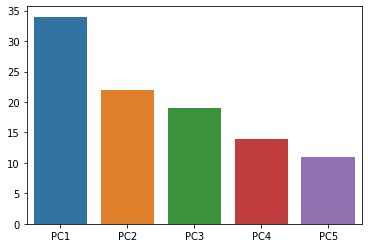

In [44]:
pca_variance = pd.DataFrame(np.round(pca.explained_variance_ratio_*100),
                            index = ['PC1','PC2','PC3','PC4','PC5'], columns = ['% Variance Ratio'])
for i in range(pca_variance.shape[0]):
    sns.barplot(x = pca_variance['% Variance Ratio'].index , 
                y = pca_variance['% Variance Ratio'].value_counts().keys())

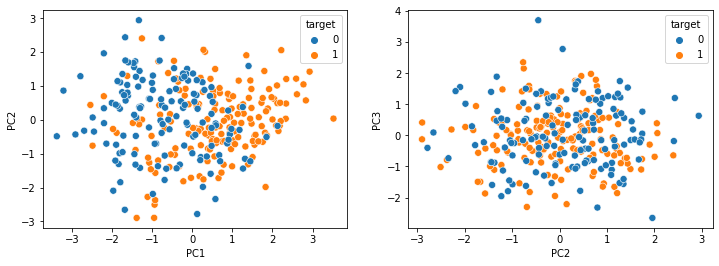

In [45]:
# Scatterplot between first 3 PCs
fig,axes = plt.subplots(1,2,figsize=(12,4))

sc1 = sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1], 
                    hue = data['target'], s=50 ,ax = axes[0])
sc1.set(xlabel='PC1', ylabel='PC2')

sc2 = sns.scatterplot(x = pca_data[:,1], y = pca_data[:,2], 
                    hue = data['target'], s=50, ax = axes[1])
sc2.set(xlabel='PC2', ylabel='PC3')
plt.show()

In [46]:
mul_data = []
for k in range(Num_data.shape[1]):
    mul = []
    for (i,j) in zip(pca_data[:,k], Num_data.iloc[:,k]):
        mul.append(i*j)
    x = sum(mul)
    print(x)

-2610.5076339765787
-2865.807245085646
-5545.098015208046
-190.17825095486089
-74.25145820366164


## Clustering

E:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The Elbow Method')

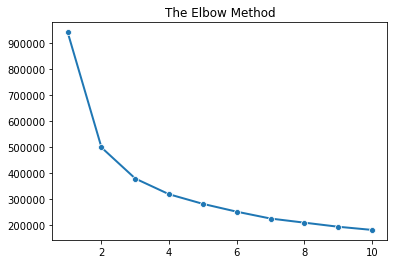

In [47]:
# Using kmeans Clustering Technique
# Elbow Method to find number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    Kmeans.fit(Num_data)
    wcss.append(Kmeans.inertia_)
sns.lineplot(range(1,11),wcss,marker = 'o', linewidth = 2)
plt.title('The Elbow Method')

In [48]:
# Clustering
clusterer = KMeans(n_clusters=3, random_state= 10)
cluster_labels = clusterer.fit_predict(Num_data)
data['Kmeans'] = pd.DataFrame(cluster_labels)

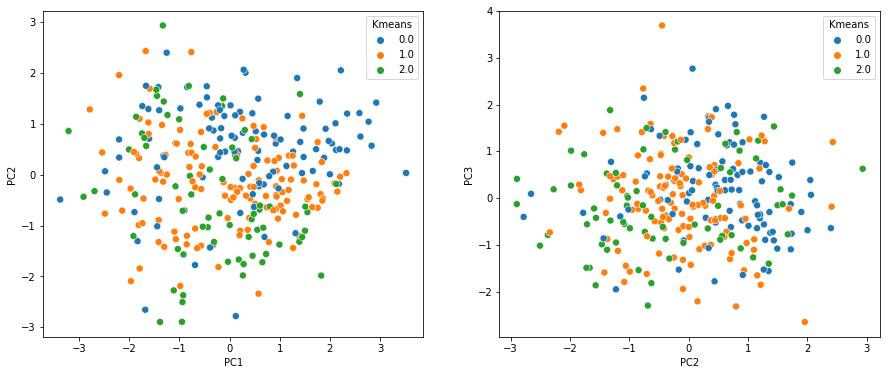

In [49]:
# Scatter plot using clustering
fig,axes = plt.subplots(1,2,figsize=(15,6))

sc1 = sns.scatterplot(x = pca_data[:,0], y = pca_data[:,1], 
                    hue = data['Kmeans'], s=50 , palette = 'tab10', ax = axes[0])
sc1.set(xlabel='PC1', ylabel='PC2')

sc2 = sns.scatterplot(x = pca_data[:,1], y = pca_data[:,2], 
                    hue = data['Kmeans'], s=50 , palette = 'tab10', ax = axes[1])
sc2.set(xlabel='PC2', ylabel='PC3')
plt.show()